Visualize regularized inverses for activation functions. Useful for intuition. Also useful for sanity checking: a brute force approach to defining the inverse should match approaches derived by other means (analytically in the case of `relu`)

In [1]:
%reset -f
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [17]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib

In [3]:
from targprop import *
from toy_data import *

# Visualize cost of the regularized inverse
For a given output $y$ and reference input $x_0$, we have the regularized inverse of a function $f$,
$$g(y, x_0) = \underset{x}{\operatorname{argmin}} \frac 1 2 \| f(x) - y \|_2^2 + \frac \gamma 2 \| x - x_0 \|_2^2. $$
For $f$ a activation function (tanh, relu, etc) we visualize the cost (the above expression inside the argmin as a function of $x$)

In [13]:
c = np.linspace(-4, 4, 401)
x1, x2 = np.meshgrid(c, c)
x_ = np.stack((x1.flatten(), x2.flatten()))

In [14]:
y = np.array([[2], [2]])
x0 = np.array([[0.5], [-1]])
#y = 2*np.random.randn(2,1)
#x0 = 2*np.random.randn(2,1)
gamma = 1

In [15]:
C = 0.5*np.sum((relu(x_)-y)**2, axis=0) + gamma*0.5*np.sum((x_ - x0)**2, axis=0)
C = np.reshape(C, [401, 401])

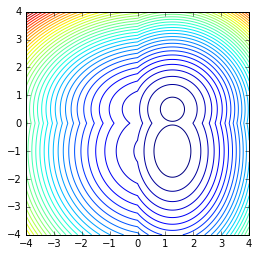

In [16]:
plt.figure()
plt.contour(x1, x2, C, 40)
plt.axis('square')
plt.show()

# Visualize regularized inverse functions
We solve the minimization problem to find $g(y,x_0)$ and visualize $g$. The solution is obtained brute force, for now, using `np.argmin`.

In [18]:
n1 = 201
ext = 2
c = np.linspace(-ext, ext, n1)
x0, y = np.meshgrid(c, c)
x = np.linspace(-10,10,1001)
x0 = x0.flatten()
y = y.flatten()

In [19]:
gamma = [0.001, 0.1, 1]

In [20]:
C = []
for _,g in enumerate(gamma):
  C.append(np.zeros(x0.shape))
  for i in range(x0.size):
    C[-1][i] = x[np.argmin(0.5*(relu(x) - y[i])**2 + g*0.5*(x - x0[i])**2)]
  C[-1] = np.reshape(C[-1], (n1, n1))

In [21]:
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

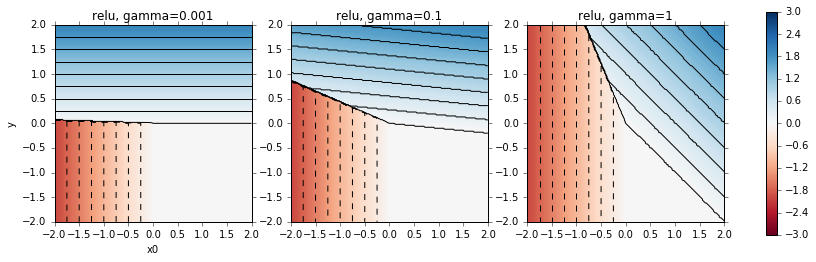

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
for j,g in enumerate(gamma):
  ct = ax[j].contour(x0.reshape((n1,n1)), y.reshape((n1,n1)),C[j],15,colors='k')
  im = ax[j].imshow(np.flipud(C[j]), cmap=cm.RdBu, interpolation='nearest', vmin=-3, vmax=3, extent=(-ext, ext, -ext, ext))
  ax[j].set_title('relu, gamma='+str(g))
plt.colorbar(im,ax=ax.ravel().tolist(), shrink=0.8)
ax[0].set_xlabel('x0')
ax[0].set_ylabel('y')
plt.show()

# Sanity check
Now use `relu_rinv` from `targprop.py` and make sure it matches the above brute force approach. The function `relu_rinv` is an analytical implementation of $g(y, x_0)$

In [13]:
XX = []
for j,g in enumerate(gamma):
  XX.append(np.zeros(x0.shape))
  for i in range(x0.size):
    XX[j][i] = relu_rinv(y[i], x0[i], gamma=g)
  XX[-1] = np.reshape(XX[-1], (n1, n1))

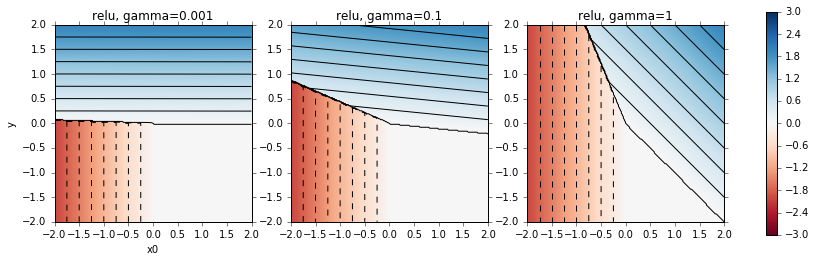

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
for j,g in enumerate(gamma):
  ct = ax[j].contour(x0.reshape((n1,n1)), y.reshape((n1,n1)),XX[j],15,colors='k')
  im = ax[j].imshow(np.flipud(XX[j]), cmap=cm.RdBu, interpolation='nearest', vmin=-3, vmax=3, extent=(-ext, ext, -ext, ext))
  ax[j].set_title('relu, gamma='+str(g))
plt.colorbar(im,ax=ax.ravel().tolist(), shrink=0.8)
ax[0].set_xlabel('x0')
ax[0].set_ylabel('y')
plt.show()